# Econometrics with Python Coursework #

## Task 1: ##

**In Task 1, the code follows the following sequence:**
1) Setup directories, import libraries and establish a list of files we will be reading.
2) Get user input for start and end dates. Use specific functions for error handling. 
3) Get user choice of 'lob' or 'tapes' data.
4) Using these dates, extract the names of the relevant files.
5) Again, with specific functions to handle errors, get user input on preferred start/end times.
6) The user decides if they want 'summary' or 'verbatim' data, and if they want the output written to a CSV file or saved as an object.
7) Several functions are imported, depending on the required output.
8) The decisions and functions are used to output the user data.

**Notes:** 
1) I have included five options for user selection. I have not included an option to unpack the 'lob' column in its entirety, however this is used in Task 2.
2) All functions, outside of the 'import_libraries.py' file, I have made myself.
3) All user input instances have an escape function, where the loop will be exited if there is a blank input. If you proceed with a missing input, this may lead to an error.
4) If you do not work sequentially, the directory may need to be changed, leading to an error. Please reset to *zip_directory* to import functions or run files.

In [1]:
# OS needed to set directory and verify it exists.
import os

# While loop, until two successful inputs. As we have not specified our directories, we need to write this loop in our notebook.
while True:
    # Ask for directory of .py files.
    zip_directory = input("Please input your location of the zip of .py files:")
    # Escape option, method to exit without an error
    if zip_directory == '':
        print("You have not entered a value for the zip directory")
        break
    # Use os to check if directory exists, notify user of the mistake, and reprompt.
    elif os.path.exists(zip_directory) == False:
        print(f"{zip_directory} does not exist. Please enter an existing directory.")
    else: 
        # If zip_directory is entered successfully, the user moves on to nested inner loop.
        while True:
            # Ask for directory of DataSet01 (or any other files to check)
            data_set_directory = input("Please input the file location of DataSet01:")
            if data_set_directory == '':
                print("You have not entered a value for your DataSet directory")
                break
            elif os.path.exists(data_set_directory) == False:
                print(f"{data_set_directory} does not exist. Please enter an existing directory.")
            else:
                print(f"Successfully selected {zip_directory} and {data_set_directory}")
                break
        # If successful or the user escapes, end both loops.
        break


Please input your location of the zip of .py files: /Users/robertnoble/Library/CloudStorage/OneDrive-UniversityofBristol/EWDS/EWPY/Assessment
Please input the file location of DataSet01: /Users/robertnoble/Library/CloudStorage/OneDrive-UniversityofBristol/EWDS/EWPY/Assessment/DataSet01


Successfully selected /Users/robertnoble/Library/CloudStorage/OneDrive-UniversityofBristol/EWDS/EWPY/Assessment and /Users/robertnoble/Library/CloudStorage/OneDrive-UniversityofBristol/EWDS/EWPY/Assessment/DataSet01


In [2]:
# We want to use zip directory to start
os.chdir(zip_directory)
# To check
os.getcwd()

'/Users/robertnoble/Library/CloudStorage/OneDrive-UniversityofBristol/EWDS/EWPY/Assessment'

In [5]:
# Import required libraries. These include libraries for all tasks.
%run -i 'import_libraries.py'

Imported 'pandas' as 'pd'.
Imported 'numpy' as 'np'.
Imported 'regex' as 're'.
Imported 'datetime' from 'datetime'.
Imported 'ast'.
Imported 'matplotlib.pyplot' as 'plt'.
Imported 'FuncAnimation' from 'matplotlib.animation'.
Imported 'HTML' from 'IPython.display'.
Imported 'patsy' from 'dmatrices'.
Imported 'statsmodels.api' as 'sm'.
Imported 'statsmodels.formula.api' as 'smf'.
Imported 'het_white' from 'statsmodels.stats.diagnostic'.


In [6]:
# This custom function uses the RegEx package to find a date sequence in a string, and then checks it with the datetime package.
from t1_functions import find_date

In [7]:
# This lists all of the DataSet01 files.
# The user should ensure the data lists successfully.
dataset_list = os.listdir(data_set_directory)

# This file turns the list into a dataframe, with a column for filename, a column for date & a column for lob/tapes.
%run -i 't1_file_list.py'

# To check it has run successfully:
file_list.head()

filename        date lob_or_tapes
0   UoB_Set01_2024-01-02LOBs.csv  2024-01-02          LOB
1  UoB_Set01_2024-01-02tapes.csv  2024-01-02        tapes
2   UoB_Set01_2024-01-03LOBs.csv  2024-01-03          LOB
3  UoB_Set01_2024-01-03tapes.csv  2024-01-03        tapes
4   UoB_Set01_2024-01-04LOBs.csv  2024-01-04          LOB

**Selecting Times and Dates**

Rather than ask for time in seconds, which is of little practical use, the user inputs their preferred  time in the format: hh:mm:ss (or to 3 DP), which is then converted to seconds after 9AM on their behalf.

The user must select start/end dates and times that are within the timeframe of the data. If they are not, the user is prompted to re-enter the date and/or time. I believe it is best for a user to be aware that their specified time/date is not within the data, and allow them to select another time or date, as we cannot assume we know the user's reasons for selecting a date. For example, if the user asks for data for the 1st of January, we cannot assume they will be happy with the 2nd instead, they may be interested in the first day of the month, so given the choice, may now select the 1st of February.

In [13]:
# User input to determine dates.
# Using the find_date function, this script works as a while loop, until the user escapes or specifies correct start/end dates.
# Checks to make sure dates are within the specified range, and the end date is not before the start date.
%run -i 't1_dates.py'

Please enter your start date in the format 'MM-DD'. The time frame is 01-02 (2024) to 06-28 (2024): 06-04


You have chosen 2024-06-04 as your start date.


Please enter your end date in the format 'MM-DD'. The time frame is 01-02 (2024) to 06-28 (2024): 05-05


2024-05-05 is not a working day. Please enter another date.


Please enter your end date in the format 'MM-DD'. The time frame is 01-02 (2024) to 06-28 (2024): 05-01


End date (2024-05-01) cannot be before start date (2024-06-04). Please enter another end-date.


Please enter your end date in the format 'MM-DD'. The time frame is 01-02 (2024) to 06-28 (2024): 06-04


You have chosen 2024-06-04 as your end date.


In [14]:
# 'While' loop to choose 'lob' or 'tapes' data. Input uses 'strip' & 'lower'.
%run -i 't1_file_type.py'

Please enter 'lob' for LOB data or 'tapes' for tape data lob


You have chosen lob data.


In [15]:
# Using the inputs, this function produces a list of the relevant files that will be read to access the data.
# We filter the lob/tapes column, and then slice dates using the inputs, outputting the selected files as a list.
from t1_functions import get_file_list

In [16]:
# Call the function with the desired inputs.
selected_files = get_file_list(file_list, file_type_input, date_input, end_date_input)

# Print to show which files are selected. 
print(f"You have selected: {selected_files}")

You have selected: ['UoB_Set01_2024-06-04LOBs.csv']


In [17]:
# Import function to check if time is valid from an input. Uses regex & datetime.
from t1_functions import find_time

# Request start/end times. They can be specified as either to the nearest second or 3 DP. Uses a while loop with error handling.
# Extra checks included to make sure the times are valid. Uses find_time. 
# If dates are the same, we check to ensure end time is not before start time.
%run -i 't1_times.py'
# Print start/end times, and seconds after 9 AM for both.

Please enter a start time in 24H format HH:MM:SS, or HH:MM:SS.fff, where 'f' is a fraction of a second (to 3 DP). Trading starts at 9:00 and ends at 17:30. 08:59:00


Error. 08:59:00.000 is before 09:00:00. Please enter a later time.


Please enter a start time in 24H format HH:MM:SS, or HH:MM:SS.fff, where 'f' is a fraction of a second (to 3 DP). Trading starts at 9:00 and ends at 17:30. 10:00:00


You have chosen 10:00:00.000 as your starting time.
3600.0 seconds after 9 AM


Please enter an end time in 24H format HH:MM:SS, or HH:MM:SS.fff, where 'f' is a fraction of a second, to 3 DP. Trading starts at 9:00 and ends at 17:30 12:00:00


You have chosen 12:00:00.000 as your ending time.
10800.0 seconds after 9 AM.


**Selecting File and Output Types**

As mentioned in the introductory notes, there are four options for the user input:
1) Summary LOB - OHLC of mid-price
2) Summary tape (total number of cancellations & trades), 
3) Verbatim LOB files 
4) Verbatim tape files

The choice will inform which function is later used to get the correct user output. Dave Cliff's OHLC code, originally intended to be called from the command line, provides the blueprint for these functions, in particular for OLHC mid-price data. However, they have all been modified into functions, and changed so that we only take the correct times and dates, as specified by the user. Each function now also has a df.to_csv line, which is used if specified by the user. We take the users directory input, and merge this with the name of the file we are reading to export to the correct destination. *Please see 't1_output_functions' for line-by-line documentation*.

Unless the user specifies 'verbatim' data, there will only be one output object, which contains the observations for all files. For verbatim data we use a **dictionary** of dataframes, with each dataframe's key pair the file name.

In [18]:
# Here the user will specify if they want 'verbatim' or 'summary' data, and if they would like to export the data as a CSV.
# Note: if the user does choose to export the data, they can specify a directory, if it does not exist it will be created.
# If export directory input is relative, or if there is no input, it will be contained within the zip_directory folder.
%run -i 't1_vb_csv_dir_choice.py'

Please choose if you prefer 'summary' or 'verbatim' data: summary


You have selected 'summary'


Would you like to export the output to a CSV file (please input 'yes' or 'no') no


You have selected 'no' to exporting as a CSV.


In [19]:
# To handle the possible user requests, I have written 4 different functions.
# They are all in the 't1_output_functions.py' file

# (i) For verbatim tape files
from t1_output_functions import vb_tape_files
# (ii) For summary tape files
from t1_output_functions import process_tape_files
# (iii) For verbatim LOB files
from t1_output_functions import vb_lob_files
# (iv) For LOB OHLC summary
from t1_output_functions import process_lob_files

In [20]:
# Output. Note, the object will be saved as a dictionary if the output is verbatim.
# If the user has chosen to output the findings as a CSV file: 
# If the user has selected summary there will only be 1 file. 
# However, if the user has selected verbatim there will be a file for every day of data.
%run -i 't1_output.py'

Output of summary lob files:
Output saved as object 't1_user_output'


## Task 2: ##
In Task 2, the code follows the following sequence.
1) Import required functions for processing the LOB column. This includes a function to split the column into bid and ask, a function to extract 'bid' numbers, a function extract ask numbers, and functions to calculate the mid and micro prices.
2) Request user input for Graph 1, which displays the LOB at a specific point in time. The user can re-use start/end dates and times from Task 1 or enter new values.
3) Apply our functions to our specified files, outputting a dataframe for the specified LOB entry.
4) Import and apply a function to make the output dataframe compatible with the Graph.
5) Using matplotlib we can output Graph 1.
6) Get time/date user inputs for the (animated) Graph 2.
7) Import a function to process several LOB entries, with each row exported as a dataframe and saved in a dictionary.
8) Using matplotlib.animate, we apply our functions to calculate mid/micro prices and adjust the data to every dataset in the dictionary and hence every frame in the graph. We output the chart as HTML so it can be animated in our notebook.

In [21]:
# Import functions

# Use ']],' to split the bid and ask orders in a LOB string, with string.split(). 
from t2_functions import split_lob

# Using Regex, we find all numbers in a string, and save as a list. 
# As the 0th position will be the price, we can use whether the index position is odd or even to assign to either price/quantity.
# We create a dataframe with a column for price and quantity
from t2_functions import extract_numbers_bid
from t2_functions import extract_numbers_ask

# As per the mid price formula, take the highest bid price and lowest ask and find the arithmetic mean.
from t2_functions import calculate_micro_price
# To apply the micro price formula, we use the prices, weighted by the counterparty quantities, for the best bid/ask orders.
# If all the values are 0s (which may occur from our chart_data function specified later), to avoid a 0 division error we return a 0.
from t2_functions import calculate_mid_price

In [22]:
# Using the same method as Task 1, the user inputs their preferred date, to select the file we will use. 
# There is also the option to select the start/end date from Task 1.
%run -i 't2_graph_1_date.py'

For Chart 1, would you like to use your specified start or end dates from Task 1? Enter 'start' for previous start date, 'end' for previous end date, or 'new' to specify a new date. start


You have chosen 2024-06-04 as your Chart 1 date.


In [23]:
# As in Task 1, we will now use our custom function to print the file we have selected.
g1_selected_files = get_file_list(file_list, 'lob', g1_date_input, g1_date_input)
print(f"You have selected: {g1_selected_files}")

You have selected: ['UoB_Set01_2024-06-04LOBs.csv']


In [24]:
# Again, we shall use the same format as Task 1, this time to select the time. 
# The user has the option to use the start or end time specified in Task 1, or a new time.
%run -i 't2_graph_1_time.py'

For Chart 1, would you like to use your specified start or end times from Task 1? Enter 'start' for previous start time, 'end' for previous end time, or 'new' to specify a new time. end


You have chosen 12:00:00.000 as your Chart 1 time.
10800.0 seconds after 9 AM


**Outputting a LOB Dataframe for Graph 1**

We will import a function to output a dataframe of the LOB column, using the specified time and date inputs. The function follows these steps:
1) Read specified file as dataframe, using only LOB/time columns.
2) If there is an exact match for specified time (i.e. it's in the data), we can proceed.
3) If there is not an exact match, we create a list of all of the absolute differences in time vs input time, and take the closest.
4) Filter to only the row we are interested in (either exact or closest time match).
5) Using our split_lob function, split the 'LOB' column into bid and ask, and then drop it.
6) We use our extract numbers functions to create two dataframes, for bid and ask, each with two columns, quantity and price.
7) Merge the dataframes and output.

In [26]:
from t2_process_lob_functions import g1_process_lobs

In [27]:
# Set to Dataset directory to process files.
os.chdir(data_set_directory)
# Use our custom function to output a dataframe.
g1_data = g1_process_lobs(g1_selected_files, g1_time_seconds)
# Print dataframe.
print(g1_data)

There was no new LOB file produced at 10800.0 seconds after 9 AM. Taking the nearest time: 10800.059
LOB file at 10800.059 seconds after 9 AM.
    bid_price  bid_quantity ask_price ask_quantity
0       148.0          11.0       149            2
1       146.0           1.0       150            2
2       144.0           5.0       155            7
3       138.0           5.0       158            1
4         NaN           NaN       161            2
5         NaN           NaN       165            3
6         NaN           NaN       168            1
7         NaN           NaN       171            2
8         NaN           NaN       174            5
9         NaN           NaN       178            1
10        NaN           NaN       181            4
11        NaN           NaN       185            6


**Making our Dataframe Compatible with the Chart**

When we merge the bid and ask dataframes in our g1_process_lobs function, in the likely event there are not equal amounts of bid and ask orders, the side of the book with less orders will be filled with N/A values until they are the same number of rows. The N/A value will not work with our chart, so we import a new function 'chart_data' to fix this, filling forward price data and replacing quantities with 0.

In [28]:
# Reset our directory to import a new function.
os.chdir(zip_directory)

# Import chart_data function to make our dataframe compatible.
from t2_chart_data import chart_data

# Apply our function to our dataframe
g1_data = chart_data(g1_data)
# Print Dataframe
print(g1_data)

    bid_price  bid_quantity  ask_price  ask_quantity
0         148            11        149             2
1         146             1        150             2
2         144             5        155             7
3         138             5        158             1
4         138             0        161             2
5         138             0        165             3
6         138             0        168             1
7         138             0        171             2
8         138             0        174             5
9         138             0        178             1
10        138             0        181             4
11        138             0        185             6


**Create Graph 1**

We use Matplotlib for our graph, following these steps:
1) Calculate mid and micro prices with our custom functions, and save these values.
2) To show the full curve, we want our quantities to start at 0. Therefore, we add a new row at the top, with the highest price and quantity set to 0. Note: it is important we do this after the mid/micro calculation, as these functions use the top values.
3) Next we use the .step option to create step plots. We also need to use the .cumsum() function so that our lines function as normal demand/supply curves (i.e. the quantity is the cumulative quantity at a specific price).
4) Add in mid and micro prices as horizontal lines, provided they are not N/A values.
5) Set title of chart using time selected, label lines with legend.

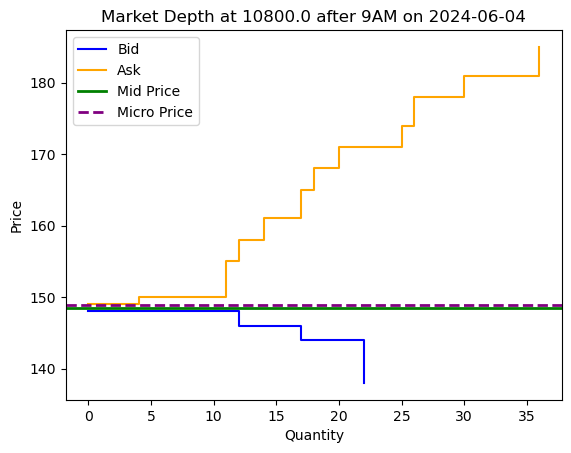

In [29]:
# Use matplotlib to create a chart using our data. We use our custom functions to calculate mid and micro prices.
%run -i 't2_graph_1.py'

In [30]:
# Specify start and end date for Chart 2. It is highly recommended start and end dates are the same. We will print a warning if not.
# Again, we use the same code as in Task 1, but with an extra option to choose the previous specified times.
%run -i 't2_graph_2_dates.py'

Would you like to use your specified start or end dates from Task 1 for Chart 2's start date? Enter 'start' for previous start date, 'end' for previous end date, or 'new' to specify a new date. start


You have chosen 2024-06-04 as your Chart 2 start date.


Would you like to use your specified start or end dates from Task 1 for Chart 2's end date? Enter 'start' for previous start date, 'end' for previous end date, or 'new' to specify a new date. It is highly recommended start and dates are the same. start


You have chosen 2024-06-04 as your Chart 2 end date.
You have selected: ['UoB_Set01_2024-06-04LOBs.csv']


In [37]:
# Specify start and end times for Chart 2. It is recommended to select a short time period (<2 minutes), we will print a warning.
# Again, we use the same code as in Task 1, but with an extra option to choose the previous specified dates.
# Note, the specified start and end times cannot be the same.
%run -i 't2_graph_2_times.py'

For Chart 2's start time, would you like to use your specified start or end times from Task 1? Enter 'start' for previous start time, 'end' for previous end time, or 'new' to specify a new time. start


You have chosen 10:00:00.000 as your Chart 2 start time.
3600.0 seconds after 9 AM


For Chart 2's end time, would you like to use your specified start or end times from Task 1? Enter 'start' for previous start time, 'end' for previous end time, or 'new' to specify a new time. new


You have chosen to select a new time.


Please enter a time for Chart 1 in HH:MM:SS or HH:MM:SS.fff, where 'f' is a fraction of a second (to 3 DP). Trading starts at 09:00 and ends at 17:30. 10:00:20


You have chosen 10:00:20.000 as your Chart 2 end time.
3620.0 seconds after 9 AM


**Outputting a Series of LOB Dataframes for Graph 2**

We import a new function to process multiple LOB rows, as is required for Graph 2. The structure of the function largely follows the structure for the first chart, but for the following changes:
1) We will now save each LOB in a dictionary of dataframes, we create an empty one to begin.
2) We must now use a *range* of times, rather than a single point in time. Like for our Task 1 output code, we first check if the file we are reading is the start/end date. If it is we must filter the rows with the start/end time.
3) When we come to save each dataframe in the dictionary, we use the 'time' variable as the key pair.

In [38]:
# Import function to process several lob rows, with the output saved as a dictionary
from t2_process_lob_functions import g2_process_lobs

In [39]:
# Set to dataframe directory
os.chdir(data_set_directory)

# Apply our function, with date and time range
combined_dataframes = g2_process_lobs(g2_selected_files, g2_start_time_seconds, g2_end_time_seconds)

# Save list of keys for dictionary, we will need this to make the animated chart
times = list(combined_dataframes.keys())

# Reset directory
os.chdir(zip_directory)


**Create Graph 2**

To make our animated chart, we will use matplotlib.animation, with help from the Matplotlib.animation documentation (see bibliography). We follow this process to make our chart:
1) Set up figure for animation. 
2) Define 'animate(i)', which works to loop through each dataframe in the dictionary, using the 'times' list of keys.
3) For each dataframe, we will apply our chart_data function, calculate mid and micro prices and add an extra 0 quantity row, as per our steps for Graph 1. We will also specify a title for each frame, depending on time after 9 AM (from the dictionary key).
4) Create our animation with FuncAnimation, with a frame for every time in our key.
5) Display animation by converting to HTML.

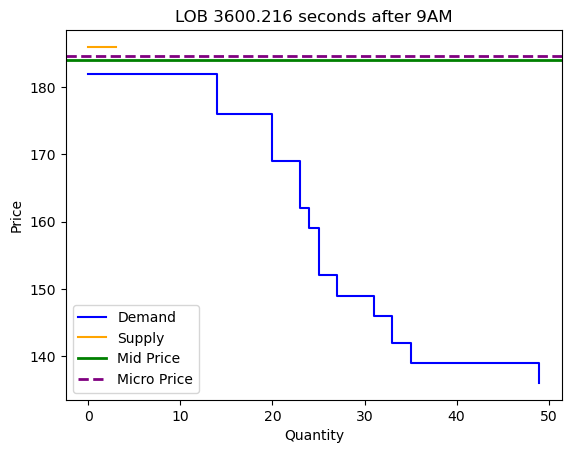

In [40]:
# Animate chart. This time we use matplotlib.animation. Each time period recorded as a LOB is a frame in our animation.
# Set up the figure for animation
fig, ax = plt.subplots()

# Call our animate(i) function
%run -i 't2_graph_2.py'

# Create our animation, one frame for each time point in the dictionary
ani = FuncAnimation(fig, animate, frames=len(times), repeat=False)

# Display animation:
HTML(ani.to_jshtml())

## Task 3 ##

Task 3 is arranged according to the following steps:
1) Clean all of our data, taking relevant quantities and prices.
2) Determine what should be classed as a 'block order', with a discussion of expected order size.
3) Scan through data to find these block orders.
4) Illustrate how mid vs micro can be used to estimate market impact, and determine the length of time we shall use.
5) Plot orders in a regression, with order size and price shift.
6) Refine regression, looking at other variables and log-log.
7) Quantile regression, advantages and disadvantages.
8) Conclusion.

### Data Cleaning ###

Rather than creating a dataframe for every single row, for Task 3 we will work more efficiently to only take the *top* bid/ask price and quantities for every row. 

Our data cleaning code follows these steps:
1) With t3_func, we find only the first values in the LOB using the ast library to save the LOB string as a python object, which it recognises as a list. 
2) As the LOB list can be read as a series of lists, we just need to know the position of the top variables we are interested in. 
3) Save the values we are interested in as price & quantity.
4) We use the t3_lob_files function to apply the t3_func to every row of every dataframe in the file list. 
5) We output our results as a series of dataframes, saved in a dictionary, with a time column, and columns for top bid/ask prices and quantities.

See below for a worked example of how the t3_func works.

In [32]:
# Import function that uses AST library to save each LOB string as a list object, and take the top ask/bid quantity and prices.
from t3_functions import t3_func

# Import function that will apply this to a series of CSV files.
from t3_functions import t3_lob_files

In [38]:
# Worked example of how our t3_func works
# Input of LOB string
lob = "[['bid', [[335, 8], [334, 7], [331, 5], [328, 12], [324, 15], [321, 2], [308, 6], [305, 4], [301, 7]]], ['ask', [[339, 2], [344, 3], [348, 8]]]]"
# Save as Python object
lob_list = ast.literal_eval(lob)
print(lob_list)
# The bid side (to find ask, this number is a 1 instead):
print(lob_list[0])
# To ignore the 'bid' text, take only values:
print(lob_list[0][1])
# To take the top values:
print(lob_list[0][1][0])

[['bid', [[335, 8], [334, 7], [331, 5], [328, 12], [324, 15], [321, 2], [308, 6], [305, 4], [301, 7]]], ['ask', [[339, 2], [344, 3], [348, 8]]]]
['bid', [[335, 8], [334, 7], [331, 5], [328, 12], [324, 15], [321, 2], [308, 6], [305, 4], [301, 7]]]
[[335, 8], [334, 7], [331, 5], [328, 12], [324, 15], [321, 2], [308, 6], [305, 4], [301, 7]]
[335, 8]


In [39]:
# Clean all of our files

# Set directory
os.chdir(data_set_directory)

# Run function on all files.
t3_file_list = get_file_list(file_list, 'lob', "2024-01-02", "2024-06-28")

# Warning: this can be a lengthy operation, as we are cleaning all of the data.
# To save time, consider changing get_file_list start and/or end date(s).
t3_cleaned_data = t3_lob_files(t3_file_list)

os.chdir(zip_directory)

Processed UoB_Set01_2024-01-02LOBs.csv
Processed UoB_Set01_2024-01-03LOBs.csv
Processed UoB_Set01_2024-01-04LOBs.csv
Processed UoB_Set01_2024-01-05LOBs.csv
Processed UoB_Set01_2024-01-08LOBs.csv
Processed UoB_Set01_2024-01-09LOBs.csv
Processed UoB_Set01_2024-01-10LOBs.csv
Processed UoB_Set01_2024-01-11LOBs.csv
Processed UoB_Set01_2024-01-12LOBs.csv
Processed UoB_Set01_2024-01-15LOBs.csv
Processed UoB_Set01_2024-01-16LOBs.csv
Processed UoB_Set01_2024-01-17LOBs.csv
Processed UoB_Set01_2024-01-18LOBs.csv
Processed UoB_Set01_2024-01-19LOBs.csv
Processed UoB_Set01_2024-01-22LOBs.csv
Processed UoB_Set01_2024-01-23LOBs.csv
Processed UoB_Set01_2024-01-24LOBs.csv
Processed UoB_Set01_2024-01-25LOBs.csv
Processed UoB_Set01_2024-01-26LOBs.csv
Processed UoB_Set01_2024-01-29LOBs.csv
Processed UoB_Set01_2024-01-30LOBs.csv
Processed UoB_Set01_2024-01-31LOBs.csv
Processed UoB_Set01_2024-02-01LOBs.csv
Processed UoB_Set01_2024-02-02LOBs.csv
Processed UoB_Set01_2024-02-05LOBs.csv
Processed UoB_Set01_2024-

### Block Orders & Market Impact ###

There is no clear rule as to what constitutes a large or 'block' order. In a frequently traded and large market, such as US Treasury bills, for a block order to have market impact it will need to be many times larger than a block order in a smaller and less liquid market. Hence, the size of the order relative to the existing trading pool is more important than the absolute size of the order. Therefore, we will not use an absolute measure of a block order, instead, we shall identify block orders in terms of size versus the highest counterparty offer, as a mismatch between supply and demand is what will lead to market impact. 

Church & Cliff (2019) (henceforth denoted by CG-19) reference a factor of 10 or more, for an orders quantity, versus the quantity of the best counterparty, as sufficient for a block order. Whilst we will partially adopt this rule, we will further refine this assumption for our data. Firstly, we require the counterparty order size to be greater than 1. Without this assumption, we will capture instances where an order appears as a block order just because there are no counterparty orders, and to ensure we do not capture orders that are not normally unusual (those around 10-15), but appear large because the counterparty is only 1. Secondly, we only accept an order to be a 'block order' if it is larger than the previous largest order on its side of the offer book. Intuitively, if we are trying to capture the initial block order, we expect it to be larger than the previous order.

The function below works to identify any LOB times where these three conditions are found. 

In [75]:
# Finder code
# The function filters out rows where either bid or ask quantities are 1 or less.
# The function then checks if either bid/ask are 10x larger than the other. 
# Lastly, the block order must be greater than the previous order on its side of the book.
from t3_block_finder import t3_block_finder

# Apply block_finder to our cleaned data set
block_data = t3_block_finder(t3_cleaned_data)

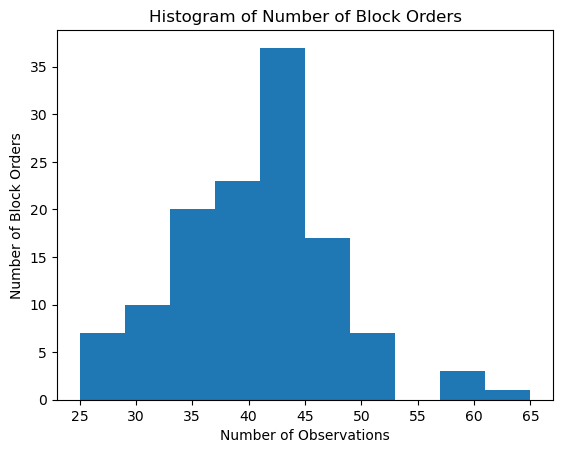

In [85]:
# To see if our method for finding block orders it should be relatively consistent between days
# Count block order instances per day
# We count the rows for every file in the block_data

%run -i t3_count_blocks

# Create a histogram of the number of observations
plt.hist(result_df['number of observations'], bins=10)
plt.xlabel('Number of Observations')
plt.ylabel('Number of Block Orders')
plt.title('Histogram of Number of Block Orders')
plt.show()

### Market Impact Time ###

Now we have established our criteria for a block order, and used it on our data, we next need to establish an appropriate timeframe to measure price changes. Again, there is not a clear rule we can apply for this. If our time frame is too long, there is a risk that we capture price changes that are not from the block order, conversely, if we are too restrictive we miss some of the market impact. 

As shown in CG-19, we can use mid and micro prices to identify block trades which are likely to have a market impact. This is helpful, as we can use these measures to estimate how long it has taken for the market to return to a sort of equilibrium, and use this as the amount of time to measure subsequent price change.

To illustrate how this works, we can use our data of an existing block order, and our animation code from Task 2, to expand on Figure 2 from CG-19:

In [73]:
# Animated actual block order demonstration, from the 2nd of January, if this is out of range then the animation will not show a block order.
# Use our function from Task 2

# Set to dataframe directory
os.chdir(data_set_directory)

# Apply our function, with date and time range
t3_combined_dataframes = g2_process_lobs(t3_file_list[0:1], 39.4, 40.5)

# Save list of keys for dictionary, we will need this to make the animated chart
t3_times = list(t3_combined_dataframes.keys())

# Reset directory
os.chdir(zip_directory)


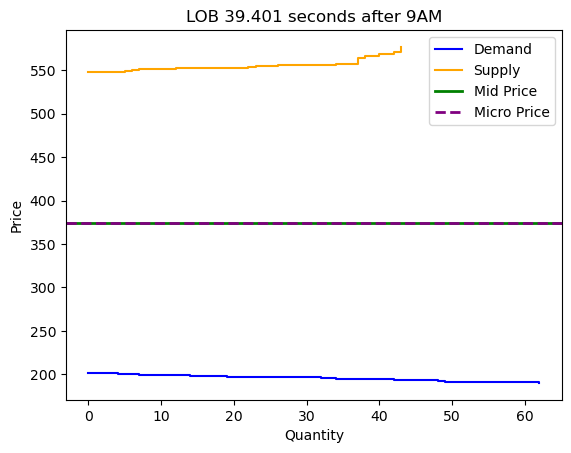

In [74]:
# Animate chart. This time we use matplotlib.animation. Each time period recorded as a LOB is a frame in our animation.
# Set up the figure for animation
fig, ax = plt.subplots()

# Call our animate(i) function
%run -i 't3_graph_2.py'

# Create our animation, one frame for each time point in the dictionary
ani = FuncAnimation(fig, t3_animate, frames=len(t3_times), repeat=False, interval = 500)

# Display animation:
HTML(ani.to_jshtml())

We can see the following sequence of events:
1) Prior to the block order (<39.5 seconds after 9), the mid and micro prices are closely aligned. This is because there is not a significant difference in the quantities of the top bid/ask orders.
2) This changes with the block order at 39.525 seconds. As the micro formula weights each price by the counterparty quantity, the lower bid price will have much more weight than the ask price, pushing the micro-price down and away from the mid-price.
3) As part of the market impact, we can expect the counterparty to adjust towards the micro price. For example, here, as there has been a supply shock, bidders will expect lower prices. In this sense, the micro-price can *predict* the future price movement.
4) We can also think of the spread between mid and micro prices as the amount of quantity-based disequilibrium in the market. If the sides are evenly weighted in quantity demanded and supplied, the mid and micro price will have exactly the same formula. However, if one side interrupts this balance, the spread will widen.

Therefore, the mid-price will follow the path predicted by the micro-price, so the spread between the mid and micro prices should fall during the market impact. If the spread widens again, either the mid price has reversed course or the micro-price has again shifted, in which case we are no longer purely observing the impact of the block order on counterparty prices, but indeed on other possible quantity movements.

Therefore, we will look at how long after a block order it takes for the mid/micro spread to narrow back to the level before the block order. 

In [90]:
# Our first step is to iterate through our cleaned data, and add our required variables.
# Using our conditions from our block finder, we mark rows as block orders with a '1', and a 0 otherwise.
# We add in mid and micro prices, and the (absolute) spread between them.

%run -i 't3_additional_variables.py'

In [182]:
# Next, we will look specifically at the block times
# We calculate how long it takes for the mid-micro spread to return to level it was before the block order
# This is done through iterating through rows after a block order and check the spread.
# We also find the counterparty price at the end of the time period.
# Lastly, we take a few conditional variables, so we are ready for a regression including price change, order size etc.

%run -i 't3_block_times.py'

# Turn our block data, with times & price changes into a single dataframe: 
# Create an empty list to store the dataframes
dfs = []
# Iterate over the dataframes in check_times and append them to the list
day = 1
for df in block_times.values():
    # Add marker to group together dataframes from same day
    df['day'] = day
    day += 1
    dfs.append(df)
# Merge all dataframes in the list into a single dataframe
block_regression_df = pd.concat(dfs, ignore_index=True)
# Drop two major outliers 
# block_regression_df = block_regression_df[block_regression_df['counterparty_price_change']<= 100]
# No longer dropping as it does not improve the normality of our residual distribution.


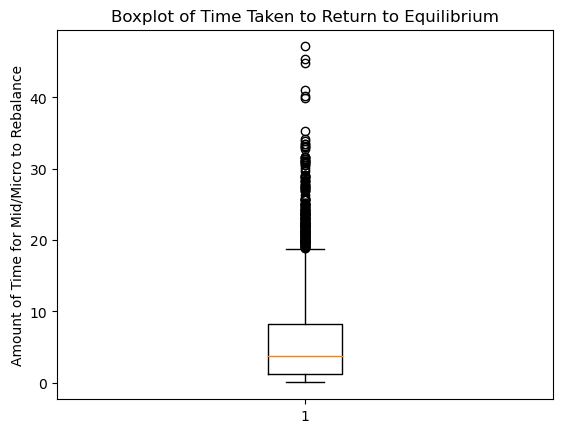

Mean: 5.790984748944158


In [183]:
# Boxplot of time distribution
plt.boxplot(block_regression_df['seconds_after_block'])
plt.title('Boxplot of Time Taken to Return to Equilibrium')
plt.ylabel('Amount of Time for Mid/Micro to Rebalance')
plt.show()

mean_time = np.mean(block_regression_df['seconds_after_block'])
print(f"Mean: {mean_time}")

The wide variation in time justifies our approach of not setting an arbitrary time limit, but instead measuring each block order before and after the mid/micro prices return to equilibrium.

### Initial Plotting and Regressions ###

We will start with an OLS regression to see whether the size of block orders impacts the absolute value of subsequent price changes.

In [184]:
# Begin with very basic OLS with just price change and block order size:

y, X = dmatrices('counterparty_price_change ~ block_order_size', data=block_regression_df, return_type='dataframe')

model1 = sm.OLS(y, X)
est1_OLS = model1.fit()
print(est1_OLS.summary())

                                OLS Regression Results                               
Dep. Variable:     counterparty_price_change   R-squared:                       0.034
Model:                                   OLS   Adj. R-squared:                  0.033
Method:                        Least Squares   F-statistic:                     148.0
Date:                       Wed, 03 Jan 2024   Prob (F-statistic):           1.70e-33
Time:                               09:35:38   Log-Likelihood:                -15405.
No. Observations:                       4262   AIC:                         3.081e+04
Df Residuals:                           4260   BIC:                         3.083e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [185]:
# Let's compare with clustered standard errors.
# We will cluster by the day where the block order happens, to capture any unseen variation.

y, X = dmatrices('counterparty_price_change ~ block_order_size', data=block_regression_df, return_type='dataframe')

model1_clust = sm.OLS(y, X)
est1_clust_OLS = model1_clust.fit(cov_type='cluster', cov_kwds={'groups': block_regression_df['day']})
print(est1_clust_OLS.summary())

                                OLS Regression Results                               
Dep. Variable:     counterparty_price_change   R-squared:                       0.034
Model:                                   OLS   Adj. R-squared:                  0.033
Method:                        Least Squares   F-statistic:                     72.05
Date:                       Wed, 03 Jan 2024   Prob (F-statistic):           5.38e-14
Time:                               09:35:43   Log-Likelihood:                -15405.
No. Observations:                       4262   AIC:                         3.081e+04
Df Residuals:                           4260   BIC:                         3.083e+04
Df Model:                                  1                                         
Covariance Type:                     cluster                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

In [140]:
from statsmodels.stats.diagnostic import het_white


# Let's test for Heteroskedasticity using White's test

# Use 'het_white' from stats models
white_test = het_white(est1_OLS.resid, est1_OLS.model.exog)

# Labelss to use for output of White's test
labels = ['Test stat', 'Test Stat p-value', 'F-Stat', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test stat': 0.7277431533576737, 'Test Stat p-value': 0.6949804407084955, 'F-Stat': 0.36367754784629347, 'F-Test p-value': 0.6951368844102337}


Results:
* We have used ordinary standard errors, followed by clustered standard errors. As there is little evidence of auto-correlation (Durbin-Watson of 2), and we fail to reject the null hypothesis of homoskedasticity given our p-values from the White test, so we don't need heteroskedastic-consistent standard errors. 
* Clustering by  which day the block order occurs does seem to capture some additional variation each day, as our standard errors slightly increase from 0.025 to 0.035. However, the P-value, F-stat and coefficient values are almost entirely unchanged.
* Our results have fairly limited explanatory power at this stage, with an adjusted R-squared value of just 0.033, so only 3.3% of the variation of the subsequent price change is explained by the proceding size of the block order.
* The model has a high F-stat and a low P-value, indicating it is statitiscally significant overall.
* The coefficient for our dependent variable is statistically significant at the 99% level, with a P-value of 0.000. An increase in the size of a block order should increase the absolute change in price, once the quantities rebalance, by 0.2985.
* However, there are high levels of skewness and kurtosis, indicating our residuals are not normally distributed. This may mean our standard errors are not fully reliable.
* It is worth mentioning that this analysis is only performed on a subset of our data, those we consider block orders.

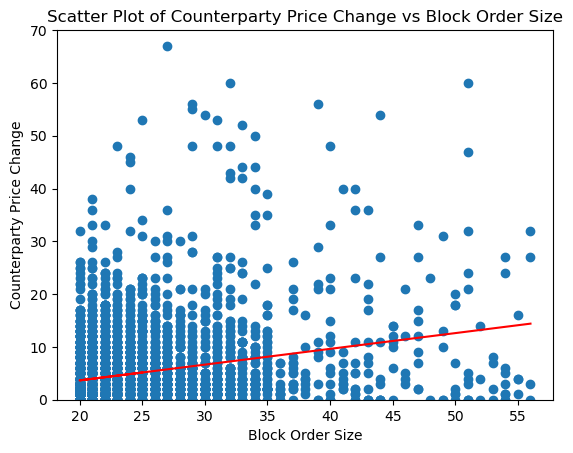

In [186]:
# Create the scatter plot
plt.scatter(block_regression_df['block_order_size'], block_regression_df['counterparty_price_change'])

# Plot our regression
coef = 0.2985
int = -2.3076
# Calculate the values of the line of best fit
line_reg = int + coef * block_regression_df['block_order_size']
# Plot the regression
plt.plot(block_regression_df['block_order_size'], line_reg, color='red')

# Set the labels
plt.xlabel('Block Order Size')
plt.ylabel('Counterparty Price Change')
plt.title('Scatter Plot of Counterparty Price Change vs Block Order Size')

# Set the y-axis limit to 70
plt.ylim(0, 70)

# Show the plot
plt.show()


In [171]:
# Add other values for regression

# Natural log of price change. Add a small value (0.0001) so that 0 changes don't become '-inf'.
block_regression_df['counterparty_price_change_log'] = np.log(block_regression_df['counterparty_price_change'] + 0.0001)

# Natural log of block order size
block_regression_df['block_order_size_log'] = np.log(block_regression_df['block_order_size'])

# Spread of bid/ask as liquidity proxy
block_regression_df['liquidity_spread'] = (block_regression_df['ask_price'] - block_regression_df['bid_price'])

# Relative size of block vs counterparty
block_regression_df['relative_block_size'] = (block_regression_df['block_order_size']/block_regression_df['cp_order_size'])

In [168]:
# Turn into log-log model
y, X = dmatrices('counterparty_price_change_log ~ block_order_size_log', data=block_regression_df, return_type='dataframe')

model2 = sm.OLS(y, X)
est2_OLS = model2.fit(cov_type='cluster', cov_kwds={'groups': block_regression_df['day']})
print(est2_OLS.summary())

                                  OLS Regression Results                                 
Dep. Variable:     counterparty_price_change_log   R-squared:                       0.007
Model:                                       OLS   Adj. R-squared:                  0.006
Method:                            Least Squares   F-statistic:                     30.18
Date:                           Wed, 03 Jan 2024   Prob (F-statistic):           2.14e-07
Time:                                   08:52:03   Log-Likelihood:                -11878.
No. Observations:                           4262   AIC:                         2.376e+04
Df Residuals:                               4260   BIC:                         2.377e+04
Df Model:                                      1                                         
Covariance Type:                         cluster                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
-----------

* Using a log-log model, we can conclude that a 1% increase in block order size leads to a 1.7% increase in the magnitude of price changes. Again, this is statistically significant. Our R-squared remains very low. Our F-stat improves slightly, and remains statistcally significant.
* The JB test P-value still indicates that the residuals are not normally distributed.
* However, this model is useful to describe the relationship in terms of *elasticities*. As a 1% change in quantity leads to a more than 1% change in price, making the response relatively elastic.

In [175]:
# Add liquidity spread and time elapsed.
y, X = dmatrices('counterparty_price_change ~ block_order_size + liquidity_spread + seconds_after_block', data=block_regression_df, return_type='dataframe')

model1_liq = sm.OLS(y, X)
est1_liq_OLS = model1_liq.fit(cov_type='cluster', cov_kwds={'groups': block_regression_df['day']})
print(est1_liq_OLS.summary())

                                OLS Regression Results                               
Dep. Variable:     counterparty_price_change   R-squared:                       0.176
Model:                                   OLS   Adj. R-squared:                  0.176
Method:                        Least Squares   F-statistic:                     58.29
Date:                       Wed, 03 Jan 2024   Prob (F-statistic):           1.41e-23
Time:                               09:17:22   Log-Likelihood:                -15065.
No. Observations:                       4262   AIC:                         3.014e+04
Df Residuals:                           4258   BIC:                         3.016e+04
Df Model:                                  3                                         
Covariance Type:                     cluster                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

* As liquidity reflects the degree to which buying or selling affects the price, it can serve as a helpful proxy of the likelihood of a 'block' order having market impact. Using Schroeter's (2014) measure of LOB liquidity as the spread between the best bid and ask price, we can add this to our regression. However, it has no impact on either our R-squared or coefficient.
* On the other hand, adding the time elapsed before the market returns to previous mid/micro equilibrium does help improve the R-squared, although it remains relatively low at 0.176. This variable, 'seconds_after_block' is statistically significant at the 99% level. Per the JB test, the residuals are still not normally distributed. This aligns with the OLS results of Abergel et al. (2015), who find that OLS coefficients of the LOB are not stable over time.
* However, the condition no. sharply increases to 299 from 57, suggesting possible collinearity.

We still have not solved our problem around non-normal distribution of errors. There are a few options we have to solve this. 
* Firstly, we can use GLM instead of OLS, but our dependent variable does not fit our typical assumptions for GLM (it's not count, binary data etc.).
* Secondly, we could use bootstrapping, but this is typically used when we cannot assume the central limit theorem, but as our dataset is large, this doessn't apply. 
* Thirdly, we could use heteroskedastic-robust standard errors, but we have shown the distribution is homoskedastic.
* Fourthly, we have shown that changing the variables to a log-log model did not solve this.
* Lastly, we can try a quantile regression. Although we will find several conditional coefficients, this is less sensitive to the normality of residual distribution.

In [192]:
y, X = dmatrices('counterparty_price_change ~ block_order_size', data=block_regression_df, return_type='dataframe')

# Fit the quantile regression model for the median (0.5 quantile), and the lower and upper quartiles.
quantile_model_25 = sm.QuantReg(y, X).fit(q=0.25)
quantile_model_50 = sm.QuantReg(y, X).fit(q=0.5)
quantile_model_75 = sm.QuantReg(y, X).fit(q=0.75)

In [193]:
# Quantile around 25th percentile:
print(quantile_model_25.summary())

                             QuantReg Regression Results                             
Dep. Variable:     counterparty_price_change   Pseudo R-squared:           -1.840e-08
Model:                              QuantReg   Bandwidth:                      0.9800
Method:                        Least Squares   Sparsity:                        6.654
Date:                       Wed, 03 Jan 2024   No. Observations:                 4262
Time:                               10:19:49   Df Residuals:                     4260
                                               Df Model:                            1
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0000      0.198      5.040      0.000       0.611       1.389
block_order_size  1.696e-07      0.008   2.14e-05      1.000      -0.016       0.016


In [194]:
# Quantile around median
print(quantile_model_50.summary())

                             QuantReg Regression Results                             
Dep. Variable:     counterparty_price_change   Pseudo R-squared:              0.01375
Model:                              QuantReg   Bandwidth:                       1.125
Method:                        Least Squares   Sparsity:                        8.590
Date:                       Wed, 03 Jan 2024   No. Observations:                 4262
Time:                               10:20:21   Df Residuals:                     4260
                                               Df Model:                            1
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.3333      0.292     -4.574      0.000      -1.905      -0.762
block_order_size     0.1667      0.012     14.213      0.000       0.144       0.190


In [195]:
# Quantile around 75th percentile
print(quantile_model_75.summary())

                             QuantReg Regression Results                             
Dep. Variable:     counterparty_price_change   Pseudo R-squared:              0.03910
Model:                              QuantReg   Bandwidth:                      0.9597
Method:                        Least Squares   Sparsity:                        20.13
Date:                       Wed, 03 Jan 2024   No. Observations:                 4262
Time:                               10:20:24   Df Residuals:                     4260
                                               Df Model:                            1
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.4138      0.593     -7.449      0.000      -5.575      -3.252
block_order_size     0.4483      0.024     18.833      0.000       0.402       0.495


By using conditional quantiles, we are less sensitive to outliers, and hence non-normal residuals. We can also see significant variation in both the R-squared and coefficient values in the three quantiles we have produced, suggesting the relationship between block size and counterparty prices change across the distribution.

However, although we can get around our issue of non-normal residuals, this does not necessarily mean this is the best model to estimate the size of the block order on counterparty prices. The coefficents may be less descriptive and less easily interpretible than our previous OLS model, as the relationship is specific to a quintile. Moreover, the R-squared remains low at all three quintiles, indicating the descriptive power of the model is still weak. Indeed, a lack of other variables we can include is the biggest contributor to the low R-squared.

It must also be said that the existence of non-normal residuals does not violate the Gauss-Markov assumptions of OLS being BLUE. Indeed, for this we are more concerned about whether the errors are uncorrelated. This is dependent on our traders for which we do not have sufficient information. If the decision to enter a block order is entirely random, as is possible with virtual traders in an experimental setting, the random incedence of treatment means we can be relatively confident that the errors are independent. However, as we do not know their underlying reasons, we cannot assume that the variables are associated with something in the error term, as would be the case with human traders, where lots of small variables which are hard to capture influence both the quantity ordered and the response of the counterparty. Therefore, we cannot necessarily say the effect is causal without further information.

## Bibliography

Hunter, John et al. “Matplotlib.animation — Matplotlib 3.4.2 Documentation.” Matplotlib.org, matplotlib.org/stable/api/animation_api.html.

Church, George M, and Dave Cliff. “A Simulator for Studying Automated Block Trading on a Coupled Dark/Lit Financial Exchange with Reputation Tracking.” Bristol Research (University of Bristol), 1 Jan. 2019, https://doi.org/10.46354/i3m.2019.emss.041. 

Schroeter, Julien. Limit Order Book Reconstruction, Visualization and Statistical Analysis of the Order Ow. 2014.

Abergel, F., Anane, M., Chakraborti, A., Jedidi, A. and Toke, I. 2015. Limit Order Books. [online] Available at: http://fiquant.mas.ecp.fr/wp-content/uploads/2015/10/Limit-Order-Book-modelling.pdf